In [1]:
import pandas as pd
from scapy.all import rdpcap
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
# Read PCAP file using Scapy
def readPCAP(pcapFile):
    packets = rdpcap(pcapFile)

    # packets[5].show()
    # Extract packet information
    packet_data = []
    for packet in packets:
        if 'IP' in packet:
            ip_layer = packet['IP']
            transport_layer = packet[ip_layer.payload.name]

            packet_info = {
                'Source IP': ip_layer.src,
                'Destination IP': ip_layer.dst,
                'Protocol': ip_layer.payload.name,
                'Source Port': transport_layer.sport if hasattr(transport_layer, 'sport') else None,
                'Destination Port': transport_layer.dport if hasattr(transport_layer, 'dport') else None,
                'Timestamp': packet.time,
                'Packet Size': len(packet)
            }
            packet_data.append(packet_info)

        # if 'ARP' in packet:
        #     packet.show()
        #     arp_layer = packet['ARP']

        #     packet_info = {
        #         'Source IP': arp_layer.psrc,
        #         'Destination IP': arp_layer.pdst,
        #         'Protocol': 'ARP',
        #         'Source Port': transport_layer.sport if hasattr(transport_layer, 'sport') else None,
        #         'Destination Port': transport_layer.dport if hasattr(transport_layer, 'dport') else None,
        #         'Timestamp': packet.time,
        #         'Packet Size': len(packet)
        #     }

    # Convert to Pandas DataFrame
    df = pd.DataFrame(packet_data)

    # Drop rows with NaN or None values
    df_cleaned = df.dropna()

    return df_cleaned

In [3]:
# vmData = "data/pcap/vm-data/capture-3-multiple.pcapng"
vmData = "data/pcap/vm-data/capture4-multiple10.pcapng"
# vmData = "data/pcap/vm-data/capture6-check-human-delay.pcapng"

df = readPCAP(vmData)

df

,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size
0,192.168.1.2,192.168.1.3,TCP,34366,8000,1715653368.7439032,74
1,192.168.1.3,192.168.1.2,TCP,8000,34366,1715653368.743954836,74
2,192.168.1.2,192.168.1.3,TCP,34366,8000,1715653368.744777291,66
3,192.168.1.2,192.168.1.3,TCP,34366,8000,1715653368.751273362,209
4,192.168.1.3,192.168.1.2,TCP,8000,34366,1715653368.751314175,66
...,...,...,...,...,...,...,...
95,192.168.1.3,192.168.1.2,TCP,8000,48730,1715653374.184683607,221
96,192.168.1.3,192.168.1.2,TCP,8000,48730,1715653374.18473712,410
97,192.168.1.2,192.168.1.3,TCP,48730,8000,1715653374.1849507,66
98,192.168.1.2,192.168.1.3,TCP,48730,8000,1715653374.196612127,66


In [4]:
def plotIAT(df):
    # display(df['Interarrival'])

    # Plot the interarrival times
    plt.plot(df.index, df['Interarrival'], marker='o')
    plt.xlabel('Packet Number')
    plt.ylabel('Interarrival Time')
    plt.title('Interarrival Times of Packets')
    plt.grid(True)
    plt.show()

,Source IP,Destination IP,Protocol,Source Port,Destination Port,Timestamp,Packet Size,Interarrival
0,192.168.1.2,192.168.1.3,TCP,34366,8000,1715653368.7439032,74,0
1,192.168.1.3,192.168.1.2,TCP,8000,34366,1715653368.743954836,74,0.000051636
2,192.168.1.2,192.168.1.3,TCP,34366,8000,1715653368.744777291,66,0.000822455
3,192.168.1.2,192.168.1.3,TCP,34366,8000,1715653368.751273362,209,0.006496071
4,192.168.1.3,192.168.1.2,TCP,8000,34366,1715653368.751314175,66,0.000040813
...,...,...,...,...,...,...,...,...
95,192.168.1.3,192.168.1.2,TCP,8000,48730,1715653374.184683607,221,0.000672591
96,192.168.1.3,192.168.1.2,TCP,8000,48730,1715653374.18473712,410,0.000053513
97,192.168.1.2,192.168.1.3,TCP,48730,8000,1715653374.1849507,66,0.00021358
98,192.168.1.2,192.168.1.3,TCP,48730,8000,1715653374.196612127,66,0.011661427


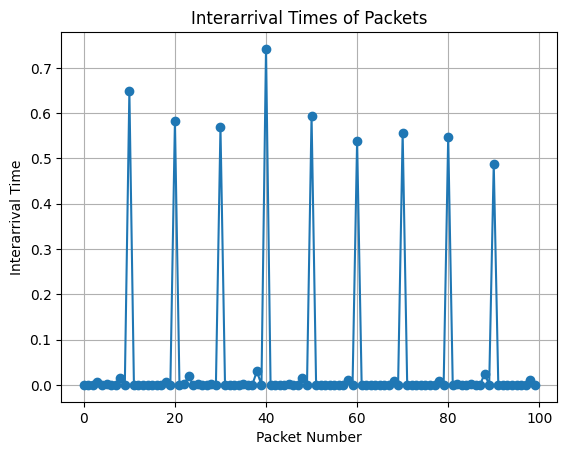

In [5]:
# Sort the dataframe by 'Timestamp' column
df.sort_values(by='Timestamp', inplace=True)

# Calculate interarrival times
df['Interarrival'] = df['Timestamp'].diff().fillna(0)

display(df)

plotIAT(df)

In [6]:
def plotTemporalPosition(df):
    # Visualize packets arrival over time
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Timestamp'], range(
        len(df)), label='Packets', color='blue')
    plt.xlabel('Timestamp')
    plt.ylabel('Packet Index')
    plt.title('Packets Arrival Over Time')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

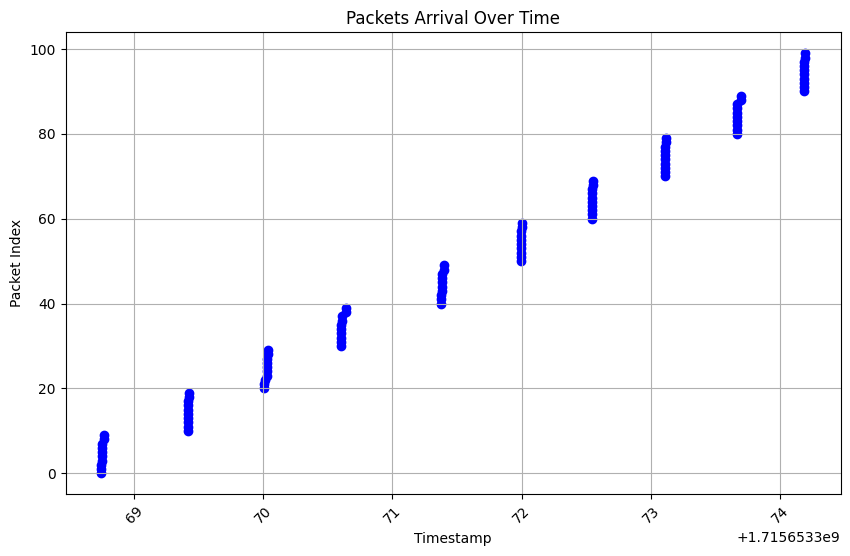

In [7]:
plotTemporalPosition(df)

In [8]:
# df = df.drop([10, 20])
df = df.drop([10, 20, 30, 40, 50, 60, 70, 80, 90])

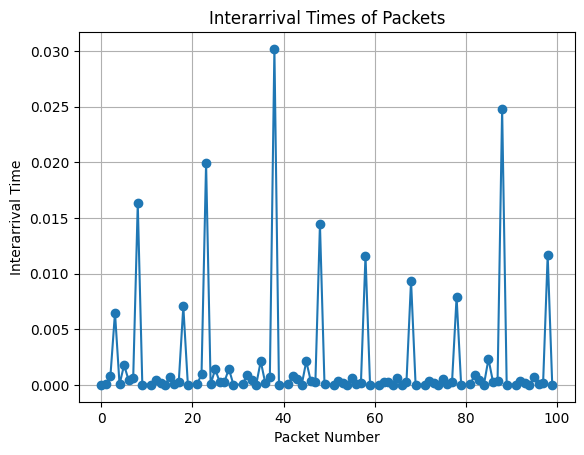

In [9]:
# # Calculate the first and third quartiles
# Q1 = df['Interarrival'].quantile(0.25)
# Q3 = df['Interarrival'].quantile(0.75)

# # Calculate the interquartile range (IQR)
# IQR = Q3 - Q1

# # Define the lower and upper bounds for outlier detection
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Remove outliers from the DataFrame
# df_no_outliers = df[(df['Interarrival'] <= upper_bound)]

# # Calculate the mean of the data without outliers
# mean_interarrival_without_outliers = df_no_outliers['Interarrival'].mean()

# # Replace outliers with the mean value
# df.loc[(df['Interarrival'] > upper_bound), 'Interarrival'] = mean_interarrival_without_outliers

# print("mean_interarrival_without_outliers: ", mean_interarrival_without_outliers)
# print("Q1: ", Q1)
# print("Q3: ", Q3)
# print("\n")

# print("DataFrame with Outliers Removed and Replaced by Mean:")
# display(df)


plotIAT(df)

In [10]:
# Removal of the peaks

# df['Interarrival'] = df['Interarrival'].apply(
#     lambda x: datetime.datetime.fromtimestamp(x))

# # Calculate z-scores for 'Value' column to identify outliers
# z_scores = (df['Interarrival'] - df['Interarrival'].mean()) / df['Interarrival'].std()

# # Define a threshold for outlier detection (e.g., z-score > 3)
# threshold = 3

# # Remove rows with outliers
# cleaned_df = df[abs(z_scores) <= threshold]

# print("Original DataFrame:")
# print(df)
# print("\nCleaned DataFrame (without outliers):")
# print(cleaned_df)